<a href="https://colab.research.google.com/github/christitensor/homeworkFIN5330/blob/master/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import math

# Problem 1 


> Part 1



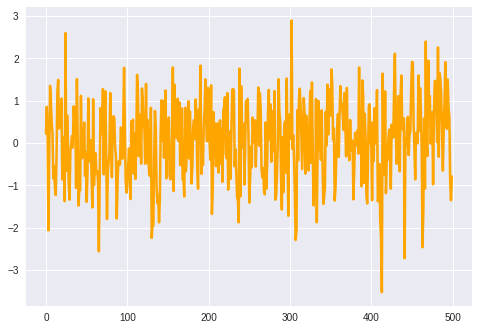

In [15]:
M = 500
rho1 = .25
y = np.zeros(M)
y[0]=np.abs(np.random.normal())
a = np.random.normal(size = M)

for t in range(1,M):
   y[t] = rho1*y[t-1] + a[t] 
a = pd.Series(a)   
y = pd.Series(y)
y.plot(grid= True, color= "orange", linewidth = 2.5)

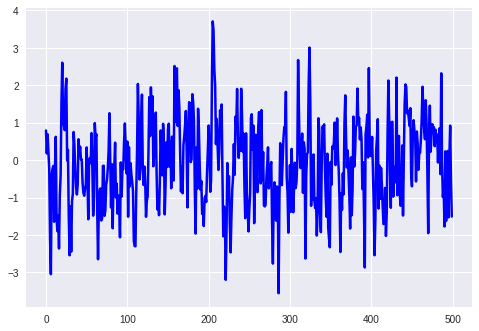

In [3]:
rho2 = .5
for t in range(1,M):
   y[t] = rho2*y[t-1] + a[t]
    
y = pd.Series(y)
y.plot(grid= True, color= "Blue", linewidth = 2.5)

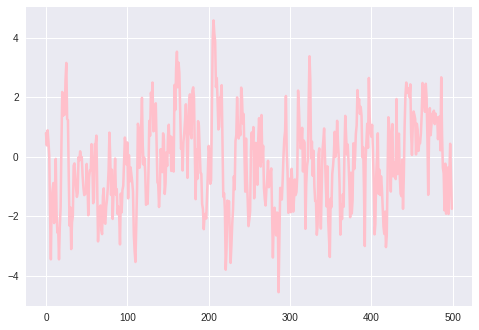

In [4]:
rho3 = .75
for t in range(1,M):
   y[t] = rho3*y[t-1] + a[t]
    
y = pd.Series(y)
y.plot(grid= True, color= "Pink", linewidth = 2.5)

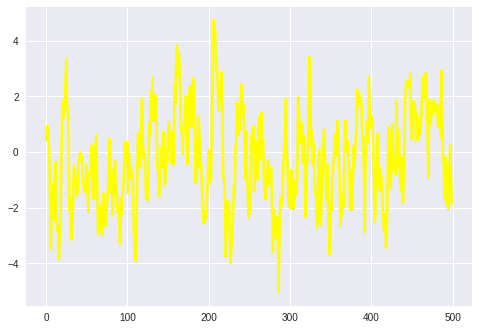

In [5]:
rho4 = .8
for t in range(1,M):
   y[t] = rho4*y[t-1] + a[t]
    
y = pd.Series(y)
y.plot(grid= True, color= "Yellow", linewidth = 2.5)

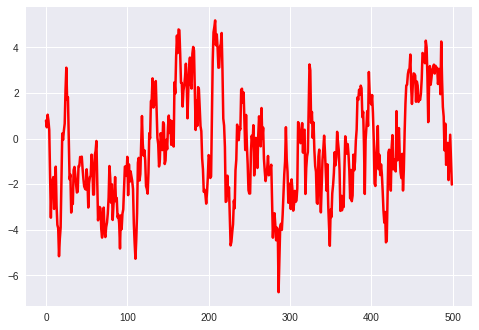

In [6]:
rho5 = .9
for t in range(1,M):
   y[t] = rho5*y[t-1] + a[t]
    
y = pd.Series(y)
y.plot(grid= True, color= "Red", linewidth = 2.5)

In [7]:
import scipy
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


>Part 3

In [8]:
a = sm.add_constant(a)

model = sm.OLS(y,a)
results = model.fit()
results.params

const   -0.438228
0        1.005710
dtype: float64

Part 4

In [0]:
import math

meanY = y.mean()
meanA = a.mean()
stdY = y.std()
stdA = a.std()
sqrtM = math.sqrt(M)
se1 = (stdY/sqrtM)

cv = meanY / (stdY/sqrtM)

alpha1 = .01
#print ("Significance Level =" , alpha1)
if cv > alpha1 :
  decision1 = ("Reject the Null Hypothesis")
elif cv < alpha1:
  decision1 = ("Fail to reject the Null Hypothesis")

In [0]:
alpha2 = .05
cv2= cv
#print ("Significance Level =" , alpha2)
if cv2 > alpha2 :
  decision2 = ("Reject the Null Hypothesis")
elif cv2 < alpha2:
  decision2 = ("Fail to reject the Null Hypothesis")

In [0]:
alpha3 = .1 
cv3 = cv
#print ("Significane Level =", alpha)
if cv3 > alpha3:
  decision3 = ("Reject the Null Hypothesis")
elif cv3 < alpha3:
  decision3 = ("Fail to reject the Null Hypthesis")

In [0]:
t1=scipy.stats.t.ppf((1-alpha1), (M-1), loc=0, scale = 1)
t2 = scipy.stats.t.ppf((1-alpha2), (M-1), loc = 0, scale = 1)
t3 = scipy.stats.t.ppf((1-alpha3), M-1, loc = 0, scale = 1)

In [0]:
problem1table = ({'Alpha' :(alpha1, alpha2, alpha3) ,
  'Critical Value': (cv , cv2, cv3),
  'Test Statistic' : (t1, t2, t3) ,
  'Decision' : (decision1, decision2, decision3) })

In [20]:
pd.DataFrame.from_dict(problem1table, orient='index')


,0,1,2
Alpha,0.01,0.05,0.1
Critical Value,-4.83709,-4.83709,-4.83709
Test Statistic,2.33384,1.64791,1.28325
Decision,Fail to reject the Null Hypothesis,Fail to reject the Null Hypothesis,Fail to reject the Null Hypthesis


Part 5



---
CLT


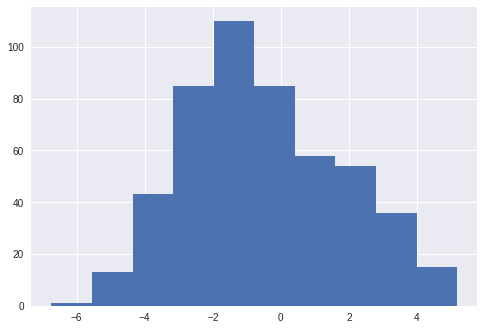

In [12]:
#CLT
import matplotlib.pyplot as plt
plt.hist(y);

Part 5
____
Bootstrap

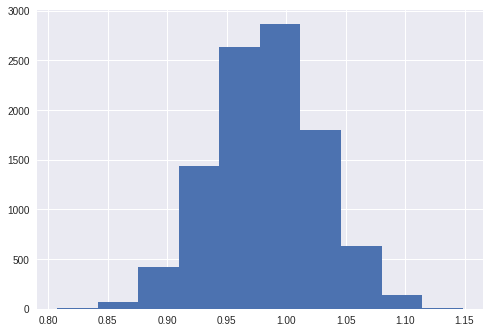

In [16]:
#bootstrap
from scipy import stats

results = stats.linregress(a, y)
ahat = results.intercept
bhat = results.slope
yhat = ahat * bhat * a
resids = y - yhat

B = 10000
vals = np.empty(B)

for b in range(B):
  z = np.random.choice(resids, size=M, replace=True)
  ysim = ahat + bhat * a + z 
  res = stats.linregress(a, ysim)
  vals[b] = res.slope
resMean = res
plt.hist(vals);

Monte Carlo

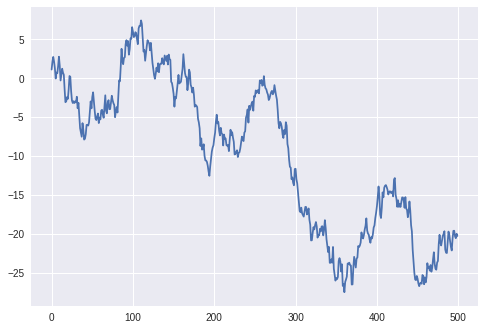

In [93]:
#monte carlo for 1.5
numObs = 10000
initValue = np.log(100.0)
phi = .05
def simulateAR1(phi = .05, numObs = 10000, initValue = np.log(100.0)):
  u = np.random.normal(numObs)
  y = np.empty(numObs)
  y[0] = initValue
  
  for t in range(1, numObs):
    y[t] = phi *y [t-1]
y = pd.Series(y)
y.plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


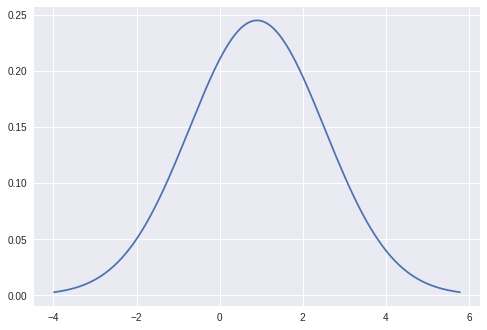

In [21]:
#CLT
import matplotlib.mlab as mlab
import math

mu = rho5
variance = ( stdY / (y[t-1] - meanY))
sigma = math.sqrt(abs(variance))
x = np.linspace(mu - 3*sigma, mu + 3*sigma, M)
plt.plot(x, mlab.normpdf(x, mu, sigma))
plt.show()


Part 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


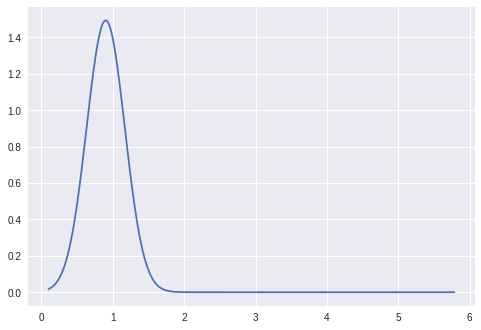

In [22]:
#1.6
c = np.zeros(M)

c[0] = np.abs(np.random.normal())
q = np.random.standard_t(5, size=M)


stdC = c.std()
meanC = c.mean()

for t in range(1,M):
  c[t] = rho5 * c[t-1] + q[t]
q = pd.Series(q)
c = pd.Series(c)

varianceC = (stdC / (c[t-1] - meanC))
sigmaC = math.sqrt(abs(varianceC))
xC = np.linspace(mu - 3* sigmaC, mu + 3* sigma, M)
plt.plot(xC, mlab.normpdf(xC, mu, sigmaC))
plt.show()


Monte Carlo

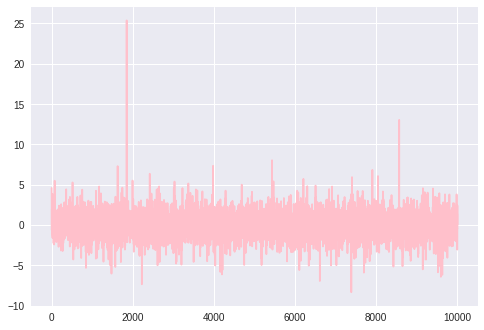

In [94]:
#monte carlo for 1.6\
v = np.random.standard_t(df = 5, size = numObs)
y2 = np.empty(numObs)
y2[0] = initValue

for t in range(1, numObs):
  y2[t] = phi * y2[t-1] + v[t]

ts2 = pd.Series(y2)
ts2.plot(grid=True, color = 'pink')

# Problem 2

Part 1

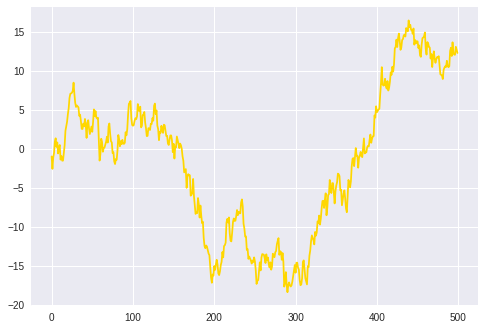

In [23]:
N = 500 
y = np.cumsum(np.random.normal(size = N))
ts1 = pd.Series(y)
ts1.plot(grid = True, color = 'gold')

In [0]:
x = np.cumsum(np.random.normal(size = N))

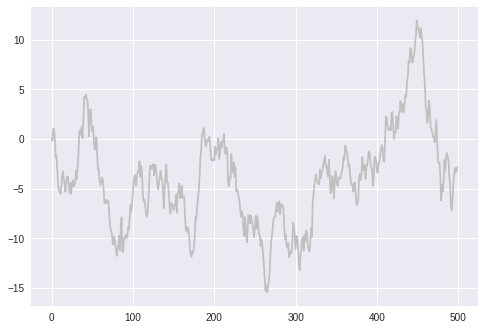

In [25]:
ts2 = pd.Series(x)
ts2.plot(grid = True, color = 'silver')

Part 3

In [0]:
import scipy.stats as stats

In [0]:
reg = stats.linregress(x,y)

In [28]:
reg

LinregressResult(slope=1.1652638307834076, intercept=3.1308894439111814, rvalue=0.6060728009810802, pvalue=1.833229304491747e-51, stderr=0.06852915839429705)

In [32]:
#rsquared 
print("R-Squared =" , (reg[2] * reg[2]))

R-Squared = 0.367324240089052


In [35]:
print("P-Value =", reg[3])

P-Value = 1.833229304491747e-51


In [45]:
print("Slope = ",reg.slope)

Slope =  1.1652638307834076


Part 4

In [0]:
whos

In [46]:
print("Assumption: Should reject the null hypothesis")
print("Actual: Fail to reject the null hypothesis")


Assumption: Should reject the null hypothesis
Actual: Fail to reject the null hypothesis


Part **5**

In [0]:
N = 500
M = 50000
beta = np.empty(M)
rsqr = np.empty(M)

for i in range(M):
  y = np.cumsum(np.random.normal(size = N))
  x = np.cumsum(np.random.normal(size = N))
  reg = stats.linregress(x,y)
  beta[i] = reg.slope
  rsqr[i] = reg.rvalue ** 2
  

Part 6/7

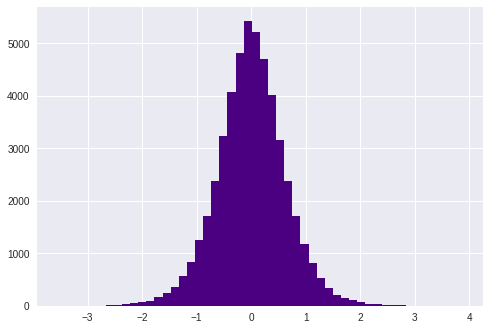

In [48]:
plt.hist(beta, bins = 50, color = 'indigo');

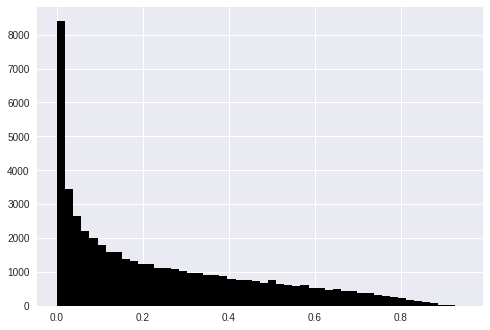

In [49]:
plt.hist(rsqr, bins = 50, color = 'black');

#Problem 3

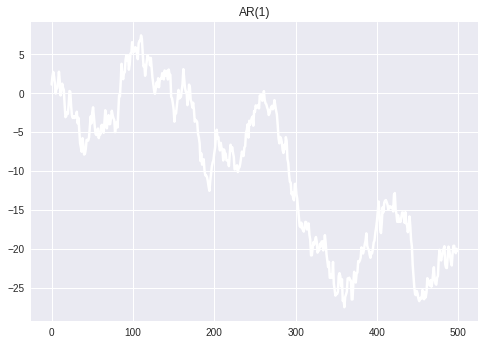

In [87]:
M = 500
rho = 1
y = np.zeros(M)
y = np.zeros(M)
y[0] = np.abs(np.random.normal())
a = np.random.normal(size = M)

for t in range(1, M):
  y[t] = rho * y[t-1] + a [t]
a = pd.Series(a)
y = pd.Series(y)
y.plot(grid = True, color = "white", linewidth = 2.5, title = "AR(1)")

In [88]:
a1 = sm.add_constant(a)

model = sm.OLS(y,a)
results = model.fit()
results.params

x1    0.919766
dtype: float64

In [89]:
meanY = y.mean()
meanA = a.mean()
stdY = y.std()
stdA = a.std()
sqrtM = math.sqrt(M)
se1 = (stdY/sqrtM)

cv = meanY / (stdY/sqrtM)

alpha1 = .01
#print ("Significance Level =" , alpha1)
if cv > alpha1 :
  decision1 = ("Reject the Null Hypothesis")
elif cv < alpha1:
  decision1 = ("Fail to reject the Null Hypothesis")
  
alpha2 = .05
cv2= cv
#print ("Significance Level =" , alpha2)
if cv2 > alpha2 :
  decision2 = ("Reject the Null Hypothesis")
elif cv2 < alpha2:
  decision2 = ("Fail to reject the Null Hypothesis")
  
alpha3 = .1 
cv3 = cv
#print ("Significane Level =", alpha)
if cv3 > alpha3:
  decision3 = ("Reject the Null Hypothesis")
elif cv3 < alpha3:
  decision3 = ("Fail to reject the Null Hypthesis")
 

t1=scipy.stats.t.ppf((1-alpha1), (M-1), loc=0, scale = 1)
t2 = scipy.stats.t.ppf((1-alpha2), (M-1), loc = 0, scale = 1)
t3 = scipy.stats.t.ppf((1-alpha3), M-1, loc = 0, scale = 1)

problem1table = ({'Alpha' :(alpha1, alpha2, alpha3) ,
  'Critical Value': (cv , cv2, cv3),
  'Test Statistic' : (t1, t2, t3) ,
  'Decision' : (decision1, decision2, decision3) })

pd.DataFrame.from_dict(problem1table, orient='index')

,0,1,2
Alpha,0.01,0.05,0.1
Critical Value,-22.7348,-22.7348,-22.7348
Test Statistic,2.33384,1.64791,1.28325
Decision,Fail to reject the Null Hypothesis,Fail to reject the Null Hypothesis,Fail to reject the Null Hypthesis


CLT

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


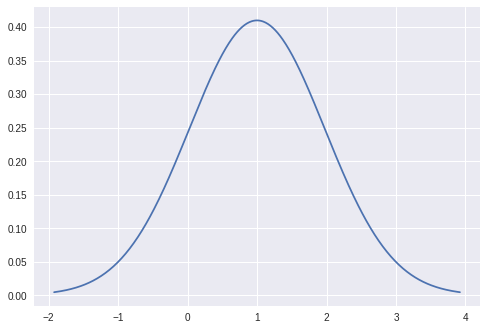

In [90]:
#CLT

mu = rho
variance = ( stdY / (y[t-1] - meanY))
sigma = math.sqrt(abs(variance))
x = np.linspace(mu - 3*sigma, mu + 3*sigma, M)
plt.plot(x, mlab.normpdf(x, mu, sigma))
plt.show()



Bootstrap

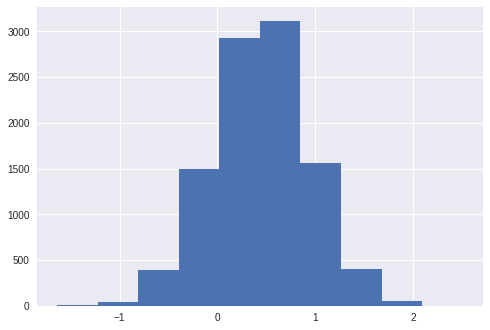

In [96]:
#BootStrap

results = stats.linregress(a, y)
ahat = results.intercept
bhat = results.slope
yhat = ahat * bhat * a
resids = y - yhat

B = 10000
vals = np.empty(B)

for b in range(B):
  z = np.random.choice(resids, size=M, replace=True)
  ysim = ahat + bhat * a + z 
  res = stats.linregress(a, ysim)
  vals[b] = res.slope
resMean = res
plt.hist(vals);

Monte Carlo for normal Distribution

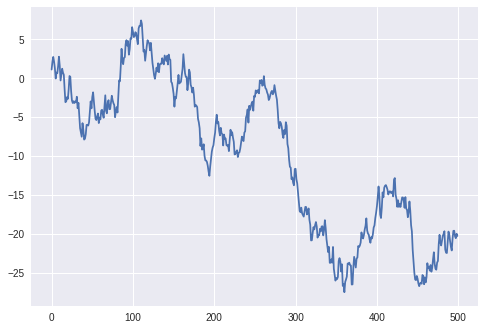

In [95]:
#monte carlo for 3.1 normal dist
phi = 1
numObs = 10000
simulateAR1(phi = 1, numObs = 10000, initValue= np.log(100.0))

y = pd.Series(y)
y.plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


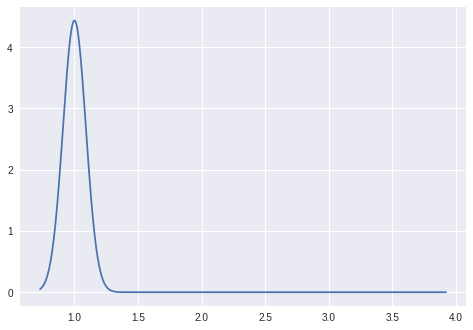

In [91]:
#3.1.6
c = np.zeros(M)

c[0] = np.abs(np.random.normal())
q = np.random.standard_t(5, size=M)


stdC = c.std()
meanC = c.mean()

for t in range(1,M):
  c[t] = rho5 * c[t-1] + q[t]
q = pd.Series(q)
c = pd.Series(c)

varianceC = (stdC / (c[t-1] - meanC))
sigmaC = math.sqrt(abs(varianceC))
xC = np.linspace(mu - 3* sigmaC, mu + 3* sigma, M)
plt.plot(xC, mlab.normpdf(xC, mu, sigmaC))
plt.show()



Monte Carlo for Student-T

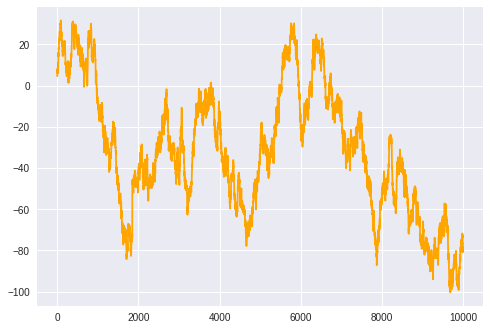

In [97]:
# monte carlo for 3.1 student t
for t in range(1, numObs):
  y2[t] = phi * y2[t-1] + v[t]

ts2 = pd.Series(y2)
ts2.plot(grid = True, color = 'orange')


#Problem 4
____
Part 1

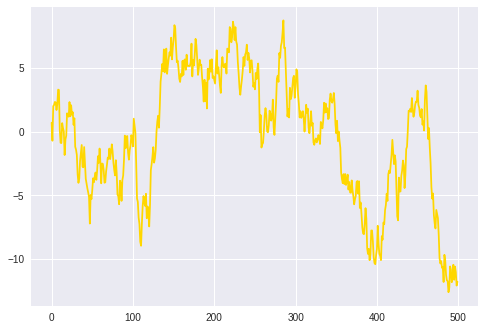

In [98]:
N = 500 
y = np.cumsum(np.random.normal(size = N))
ts1 = pd.Series(y)
ts1.plot(grid = True, color = 'gold')

Part 2

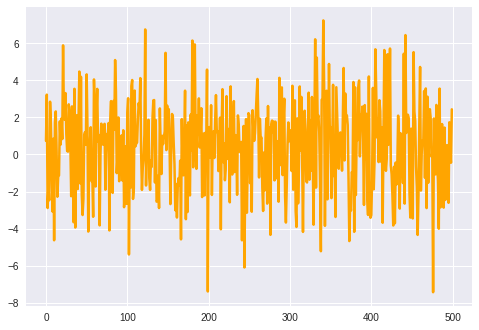

In [99]:
M = 500
y = np.zeros(M)
y[0]=np.abs(np.random.normal())
x = np.random.normal(size = M)
alpha = .22
beta = 2.5
e = np.random.normal(loc = .5, scale = .5, size = M) 

for t in range(1,M):
   y[t] = alpha + beta*x[t]

e = pd.Series(e)
x = pd.Series(x)   
y = pd.Series(y)
y.plot(grid= True, color= "orange", linewidth = 2.5)

Part 3

In [84]:
a = 0.22
b = 2.5

u = np.random.normal(size = N)
x = np.cumsum(np.random.normal(size = N))
y = a + b * x + u 
reg = stats.linregress(x, y)

Dy = y[1:] - y[:-1]
Dx = x[1:] - x[:-1]
# z is the fitted residuals
z = y- reg.intercept - reg.slope * x

print("Dy Shape= ",Dy.shape)
print("Dx Shape = ", Dx.shape)
print("z shape =", z.shape)

Dy Shape=  (499,)
Dx Shape =  (499,)
z shape = (500,)


In [85]:
Dy = Dy[1:]
Dx = Dx[1:]
z = z[2:]
# 4 is the # of coumns in the regression
X = np.ones((N-2,4))
X[:,1] = z
X[:,2] = Dy
X[:,3] = Dx
Y = Dy

print("X Shape = ", X.shape)

X Shape =  (498, 4)


Part 4

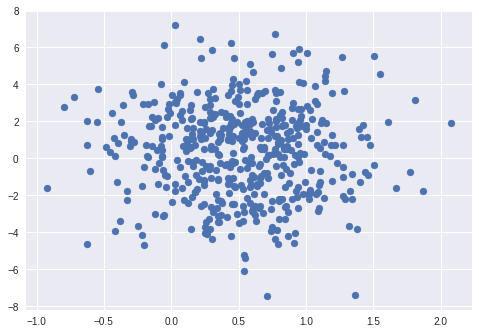

In [100]:
plt.scatter(e,y)

Part 5

In [106]:
#adf
from statsmodels.tsa.stattools import adfuller
adfy= adfuller(y)
adfy
adfx=adfuller(x)
if adfy[1] > adfy[4]['10%']: 
  print ("Fail to reject that there is a unit root for y")
else:
  print ("Reject that there is a unit root for y")
  
if adfx[1] > adfx[4]['10%']: 
  print ("Fail to reject that there is a unit root for x")
else:
  print ("Reject that there is a unit root for x")

Fail to reject that there is a unit root for y
Fail to reject that there is a unit root for x


Part 6

In [107]:
adfe = adfuller(e)
adfe

(-14.418797414335641,
 7.976016048561528e-27,
 1,
 498,
 {'1%': -3.4435494520411605,
  '10%': -2.5698704830567247,
  '5%': -2.8673612117611267},
 650.5388845103923)

In [108]:
eols = sm.add_constant(e)

model = sm.OLS(y,e)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.815
Date:                Fri, 22 Mar 2019   Prob (F-statistic):             0.0162
Time:                        04:10:14   Log-Likelihood:                -1156.9
No. Observations:                 500   AIC:                             2316.
Df Residuals:                     499   BIC:                             2320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3780      0.157      2.411      0.016       0.070       0.686
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                1.056
Skew:                          -0.103   Prob(JB):                        0.590
Kurtosis:                       2.910   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
coef= results.params

In [119]:
al = coef + np.cumsum(y) + np.cumsum(e)
a1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:3140: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


,const,0
0,1.0,-1.644036
1,1.0,1.003981
2,1.0,0.618407
3,1.0,-0.597743
4,1.0,-0.847399
